In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), "..")))
from example_package import model, training, datasets, metrics
from tqdm import tqdm
from scipy.stats import bootstrap
import pickle
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
exp_name = 'test'
cvar_name = 'n_hidden'
cvalues = [2,3]

In [38]:
def get_postfix(exp_name,cvar_name,cvar_value):
    return f'{exp_name}/{cvar_name}_{cvar_value}'

def load_file(exp_name,cvar,value):
    file_name = f'../data/{get_postfix(exp_name,cvar,value)}.pkl'
    results = pickle.load(open(file_name, 'rb+'))
    return results

def load_xvals(exp_name,cvar):
    file_name = f'../data/{exp_name}/{cvar}_xvals.pkl'
    results = pickle.load(open(file_name, 'rb+'))
    return results

def load_experiment(exp_name,cvar,values):
    data = []
    for val in values:
         y = load_file(exp_name,cvar,val)
         data.append(y)
    output = np.concatenate((data,))
    return output

In [39]:
x_vals =load_xvals(exp_name,cvar_name)

In [40]:
x_vals

[2, 3]

In [41]:
y = load_experiment(exp_name,cvar_name,cvalues)

In [48]:
y

array([[1., 0.],
       [1., 0.]])

In [42]:
def mean_statistic(data, axis=1):
    return np.mean(data, axis=axis)

In [49]:
print(y.shape)
means_bs = bootstrap((y,), mean_statistic,axis=1)#, n_resamples=1000, vectorized=True, axis=0)
ci_lower,ci_upper = means_bs.confidence_interval
ci_lower

(2, 2)


array([0., 0.])

In [50]:
y_lims = (0,np.max(y))

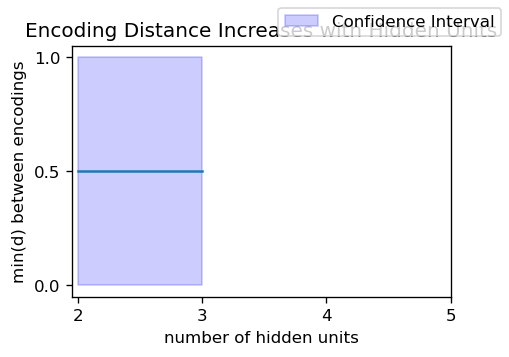

In [53]:
fig, ax = plt.subplots(figsize=(4,3),dpi=120)
ax.plot(x_vals,np.mean(y,1))
ax.fill_between(x_vals, ci_lower, ci_upper, color='blue', alpha=0.2, label='Confidence Interval')
ax.set_xlabel('number of hidden units')
ax.set_ylabel('min(d) between encodings')
ax.set_yticks(np.linspace(*y_lims,3))
ax.set_xticks([2,3,4,5])
fig.legend()
#ax.set_xscale('log')
ax.set_title('Encoding Distance Increases with Hidden Units')
fig.tight_layout()
fig.savefig('encoding_distance.png')
plt.show()